In [33]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

Consider the dataset: [10, 12, 12, 14, 15, 15, 16, 17, 18, 100].

 The value 100 is much higher than the rest of the data points and is likely an outlier.

Types of Outliers

Univariate Outliers: Outliers in a single variable.

Multivariate Outliers: Outliers in a combination of two or more variables.

# extreme value analysis for outliers using univariate methods


In [34]:
import numpy as np
import pandas as pd
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
%matplotlib inline
rcParams['figure.figsize']=8,4
sns.set_style('whitegrid')

In [36]:
address='/workspaces/jupyter-example/iris.data.csv'
df=pd.read_csv(address)
df.columns=["Sepal Length","Sepal Width","Petal Length","Petal Width","Species"]
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [37]:
x=df.iloc[:,0:4].values
y=df.iloc[:,4].values

{'whiskers': [<matplotlib.lines.Line2D at 0x76985de21480>,
 'caps': [<matplotlib.lines.Line2D at 0x76985de219c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x76985de211e0>,
 'medians': [<matplotlib.lines.Line2D at 0x76985de21f00>,
 'fliers': [<matplotlib.lines.Line2D at 0x76985de221a0>,
 'means': []}

[]

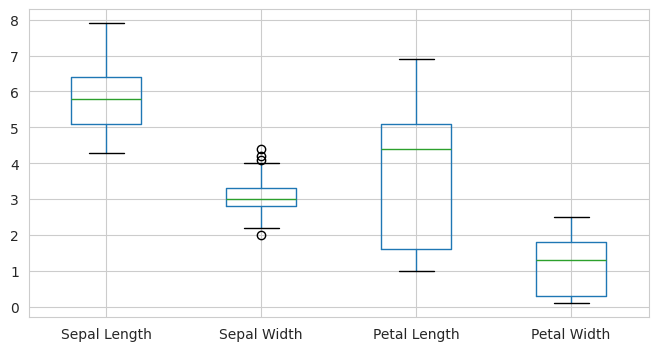

In [38]:
df.boxplot(return_type='dict')
plt.plot()

**as we can see outlier located in sepel width ,we can spot the bubulles there**

In [39]:
sepel_width=x[:,1]
iris_outlier=(sepel_width>4)
df[iris_outlier]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
14,5.7,4.4,1.5,0.4,setosa
31,5.2,4.1,1.5,0.1,setosa
32,5.5,4.2,1.4,0.2,setosa


In [40]:
sepel_width=x[:,1]
iris_outlier=(sepel_width<2.05)
df[iris_outlier]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
59,5.0,2.0,3.5,1.0,versicolor


# applying tukey method outlier labelling

In [41]:
pd.options.display.float_format='{:.1f}'.format
x_df=pd.DataFrame(x)
print(x_df.describe())

          0     1     2     3
count 149.0 149.0 149.0 149.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.4   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


In [42]:
Q1 = df['Sepal Width'].quantile(0.25)
Q3 = df['Sepal Width'].quantile(0.75)
IQR = Q3 - Q1
Q1
Q3
IQR

2.8

3.3

0.5

In [43]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound
upper_bound

2.05

4.05

In [44]:
outliers = df[(df['Sepal Width'] < lower_bound) | (df['Sepal Width'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
     Sepal Length  Sepal Width  Petal Length  Petal Width     Species
14           5.7          4.4           1.5          0.4      setosa
31           5.2          4.1           1.5          0.1      setosa
32           5.5          4.2           1.4          0.2      setosa
59           5.0          2.0           3.5          1.0  versicolor


this is mathematical method for finding outliers

In [45]:
import numpy as np
import pandas as pd

# Example data
data = [10, 12, 12, 14, 15, 15, 16, 17, 18, 100]
df = pd.DataFrame(data, columns=['Value'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
    Value
9    100
